In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets
data = datasets.load_boston()

In [2]:
x = np.array([5,15,25,35,45,55])
y = np.array([5,20,14,32,22,38])

print(x)
print(y)

[ 5 15 25 35 45 55]
[ 5 20 14 32 22 38]


In [3]:
x.shape, x.ndim  # harus (6,1)

((6,), 1)

In [4]:
x = x.reshape((-1,1))
print(x)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]


In [5]:
#create model,.. tapi masih dummy
model = LinearRegression()
model

LinearRegression()

In [6]:
#harus training dulu
model.fit(x,y)

LinearRegression()

In [7]:
r_squared = model.score(x,y)
print("Coefficient of determination:", r_squared)

Coefficient of determination: 0.715875613747954


In [13]:
#cara prediksi
y_pred = model.predict(x)
print("data input:", x.flatten())
print("prediction:", y_pred)
print("true target:", y)
print("base model:", [y.mean().tolist()]*x.shape[0])

data input: [ 5 15 25 35 45 55]
prediction: [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
true target: [ 5 20 14 32 22 38]
base model: [21.833333333333332, 21.833333333333332, 21.833333333333332, 21.833333333333332, 21.833333333333332, 21.833333333333332]


In [11]:
print("model coefficient:", model.coef_)
print("model intercept:", model.intercept_)

model coefficient: [0.54]
model intercept: 5.633333333333329


In [12]:
# w0 + w1x1 atau b + ax
model.intercept_ + model.coef_*[5]

array([8.33333333])

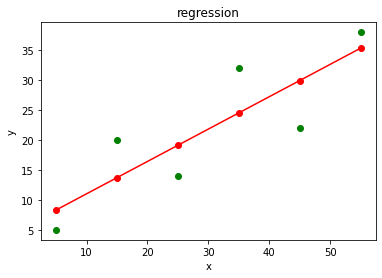

In [16]:
plt.scatter(x, y, c="green")
plt.plot(x, y_pred, c="red")
plt.scatter(x, y_pred, c="red")

plt.title("regression")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [17]:
# misal ada data baru

new_data = np.arange(5).reshape((-1,1))
print(new_data)

[[0]
 [1]
 [2]
 [3]
 [4]]


In [18]:
model.predict(new_data)

array([5.63333333, 6.17333333, 6.71333333, 7.25333333, 7.79333333])

Multiple Linear Regression

In [20]:
x = np.array([[0,1], [5,1], [15,2], [25,5], [35,11], [45,15], [55,34], [60,35]])
y = np.array([4,5,20,14,32,22,38,43])

print(x, x.shape)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]] (8, 2)
[ 4  5 20 14 32 22 38 43]


In [21]:
mv_model = LinearRegression()
mv_model.fit(x,y)

mv_r2 = mv_model.score(x,y)
mv_coef = mv_model.coef_
mv_bias = mv_model.intercept_

print("Coefficient of determination:", mv_r2)
print("Coefficient/Parameters/Weights:", mv_coef)
print("Slope/Bias:", mv_bias)


Coefficient of determination: 0.8615939258756775
Coefficient/Parameters/Weights: [0.44706965 0.25502548]
Slope/Bias: 5.52257927519819


In [23]:
y_pred = mv_model.predict(x)
print("true y:", y)
print("predictions:", y_pred.round(2))

true y: [ 4  5 20 14 32 22 38 43]
predictions: [ 5.78  8.01 12.74 17.97 23.98 29.47 38.78 41.27]


In [28]:
#w0 + w1x1 + w2x2

(mv_bias + mv_coef.dot([0,1])).round(2)

5.78

In [29]:
#w0 + w1x1 + w2x2

(mv_bias + mv_coef.dot(x[-1])).round(2)

41.27

Polynomial Regression

In [32]:
x = np.array([5,15,25,35,45,55]).reshape((-1,1)) 
#--> atau bisa juga ditulis x = np.array([[5],[15],[25],[35],[45],[55]]) tanpa re-shape

y = np.array([15,11,2,8,25,31])

print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 31]


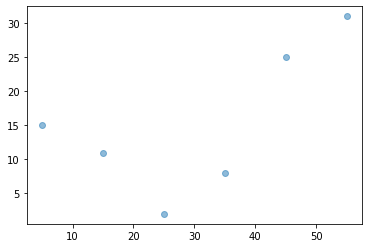

In [33]:
plt.scatter(x,y, alpha=0.5)

In [34]:
poly = PolynomialFeatures(include_bias=False)
poly

PolynomialFeatures(include_bias=False)

In [35]:
#generate fitur baru, dan kita perlu pre proses datanya, x saja, tanpa perlu y
poly.fit(x)

PolynomialFeatures(include_bias=False)

In [37]:
poly_x = poly.transform(x)
print(poly_x)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [40]:
poly_model = LinearRegression()
poly_model.fit(poly_x,y)

poly_r2 = mv_model.score(poly_x,y)
poly_coef = mv_model.coef_
poly_bias = mv_model.intercept_

print("Coefficient of determination:", poly_r2)
print("Coefficient/Parameters/Weights:", poly_coef)
print("Slope/Bias:", poly_bias)

y_pred = poly_model.predict(poly_x)
print("True Target:", y)
print("Prediction:", y_pred)

Coefficient of determination: -1697.308490615497
Coefficient/Parameters/Weights: [0.44706965 0.25502548]
Slope/Bias: 5.52257927519819
True Target: [15 11  2  8 25 31]
Prediction: [15.35714286  8.01428571  6.17142857  9.82857143 18.98571429 33.64285714]


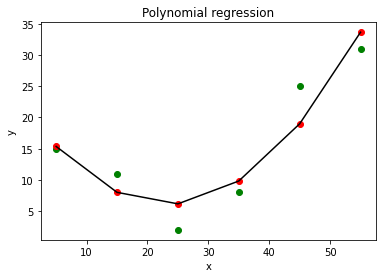

In [42]:
plt.scatter(x, y, c="green")
plt.plot(x, y_pred, c="black")
plt.scatter(x, y_pred, c="red")

plt.title("Polynomial regression")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Coefficient of determination: 0.9997575953458306
Coefficient/Parameters/Weights: [ 3.74960317e+00 -3.50625000e-01  1.01111111e-02 -8.75000000e-05]
Slope/Bias: 3.832217262419155
True Target: [15 11  2  8 25 31]
Prediction: [15.02380952 10.88095238  2.23809524  7.76190476 25.11904762 30.97619048]


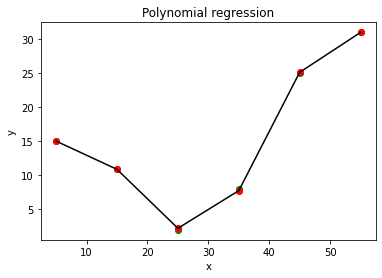

In [44]:
#generate polnomial features
poly = PolynomialFeatures(degree=4, include_bias=False)
#poly.fit(x) --> hanya assign fit x ke poly saja
poly_x = poly.fit_transform(x)

#fit poly features to linear regressions
poly_model = LinearRegression()
poly_model.fit(poly_x,y)

#evaluate metrics
poly_r2 = poly_model.score(poly_x,y)
poly_coef = poly_model.coef_
poly_bias = poly_model.intercept_

print("Coefficient of determination:", poly_r2)
print("Coefficient/Parameters/Weights:", poly_coef)
print("Slope/Bias:", poly_bias)

#predict
y_pred = poly_model.predict(poly_x)
print("True Target:", y)
print("Prediction:", y_pred)

#visualize
plt.scatter(x, y, c="green")
plt.plot(x, y_pred, c="black")
plt.scatter(x, y_pred, c="red")

plt.title("Polynomial regression")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [48]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [51]:
df = pd.DataFrame(data.data, columns= data.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [53]:
target = pd.DataFrame(data.target, columns=["MEDV"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [55]:
display(df.head())
display(target.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [57]:
x = df
y = target['MEDV']

#modelling lr
lr = LinearRegression()
lr.fit(x,y)

predictions = lr.predict(x)

#eval
print("R2:", lr.score(x,y))

R2: 0.7406426641094095


In [58]:
df["targets"] = y
df["predictions"] = predictions

In [59]:
#coba sampling

df.sample(n=20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,targets,predictions
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21,19.3,22.096698
362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19,20.8,18.228468
82,0.03659,25.0,4.86,0.0,0.426,6.302,32.2,5.4007,4.0,281.0,19.0,396.90,6.72,24.8,26.035763
160,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50,27.0,32.708277
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1,18.582152
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9,1.718518
228,0.29819,0.0,6.20,0.0,0.504,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92,46.7,35.456652
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71,26.7,33.184197
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0,18.999497
20,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02,13.6,12.523858
